
# Glass Ring in vacuum

Same as seen in adapt.py

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggScalar, Bragg
from fiberamp.fiber.microstruct.bragg import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


In [24]:
n_air = 1
n_glass = 1.44

ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]

ts = [5e-05, 1e-5, 5e-05]

mats = ['air', 'glass', 'air']

maxhs = [.1,.01, .1]
wl = 4e-06
scale = ts[0]

In [25]:
A = BraggScalar(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=wl, scale=scale, contour=True)


Boundary names not provided, using default names.


In [27]:
k_low = A.k0 * A.ns[0] * A.scale
k_high = A.k0 * A.ns[1] * A.scale
k_low, k_high

(78.53981633974485, 113.09733552923257)

In [28]:
outer = 'h2'
Ktype = 'kappa'
nu = 0

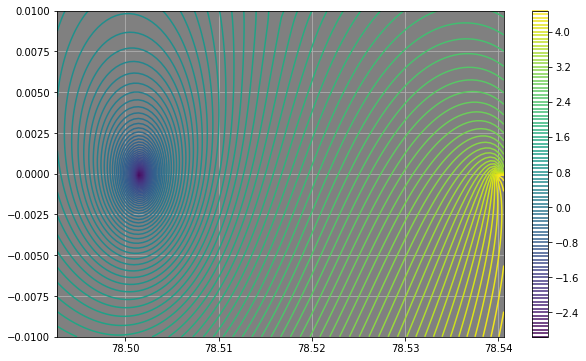

In [30]:
plotlogf(A.determinant,.9994*k_low,1.00001*k_low, -.01,.01, nu, outer, Ktype,
         iref=100, rref=100, levels=100, figsize=(10,6))

In [35]:
guess = np.array(78.5)

beta1 = newton(A.determinant, guess, args=(nu, outer, Ktype), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (78.5015615907877-9.807501678018321e-05j) . Residual of determinant:  2.020682795011626e-12


# Bragg Scalar Function

In [36]:
Fs = A.all_fields(beta1, nu, outer, Ktype)

In [37]:
Draw(1e1*Fs['U'], A.mesh, min=0, max=.1)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [39]:
Draw(Fs['grad_U'].real, A.mesh, vectors={'grid_size':200})

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

### 1D

In [52]:
u = A.fields_matplot(beta1, nu, outer, Ktype)

<IPython.core.display.Javascript object>


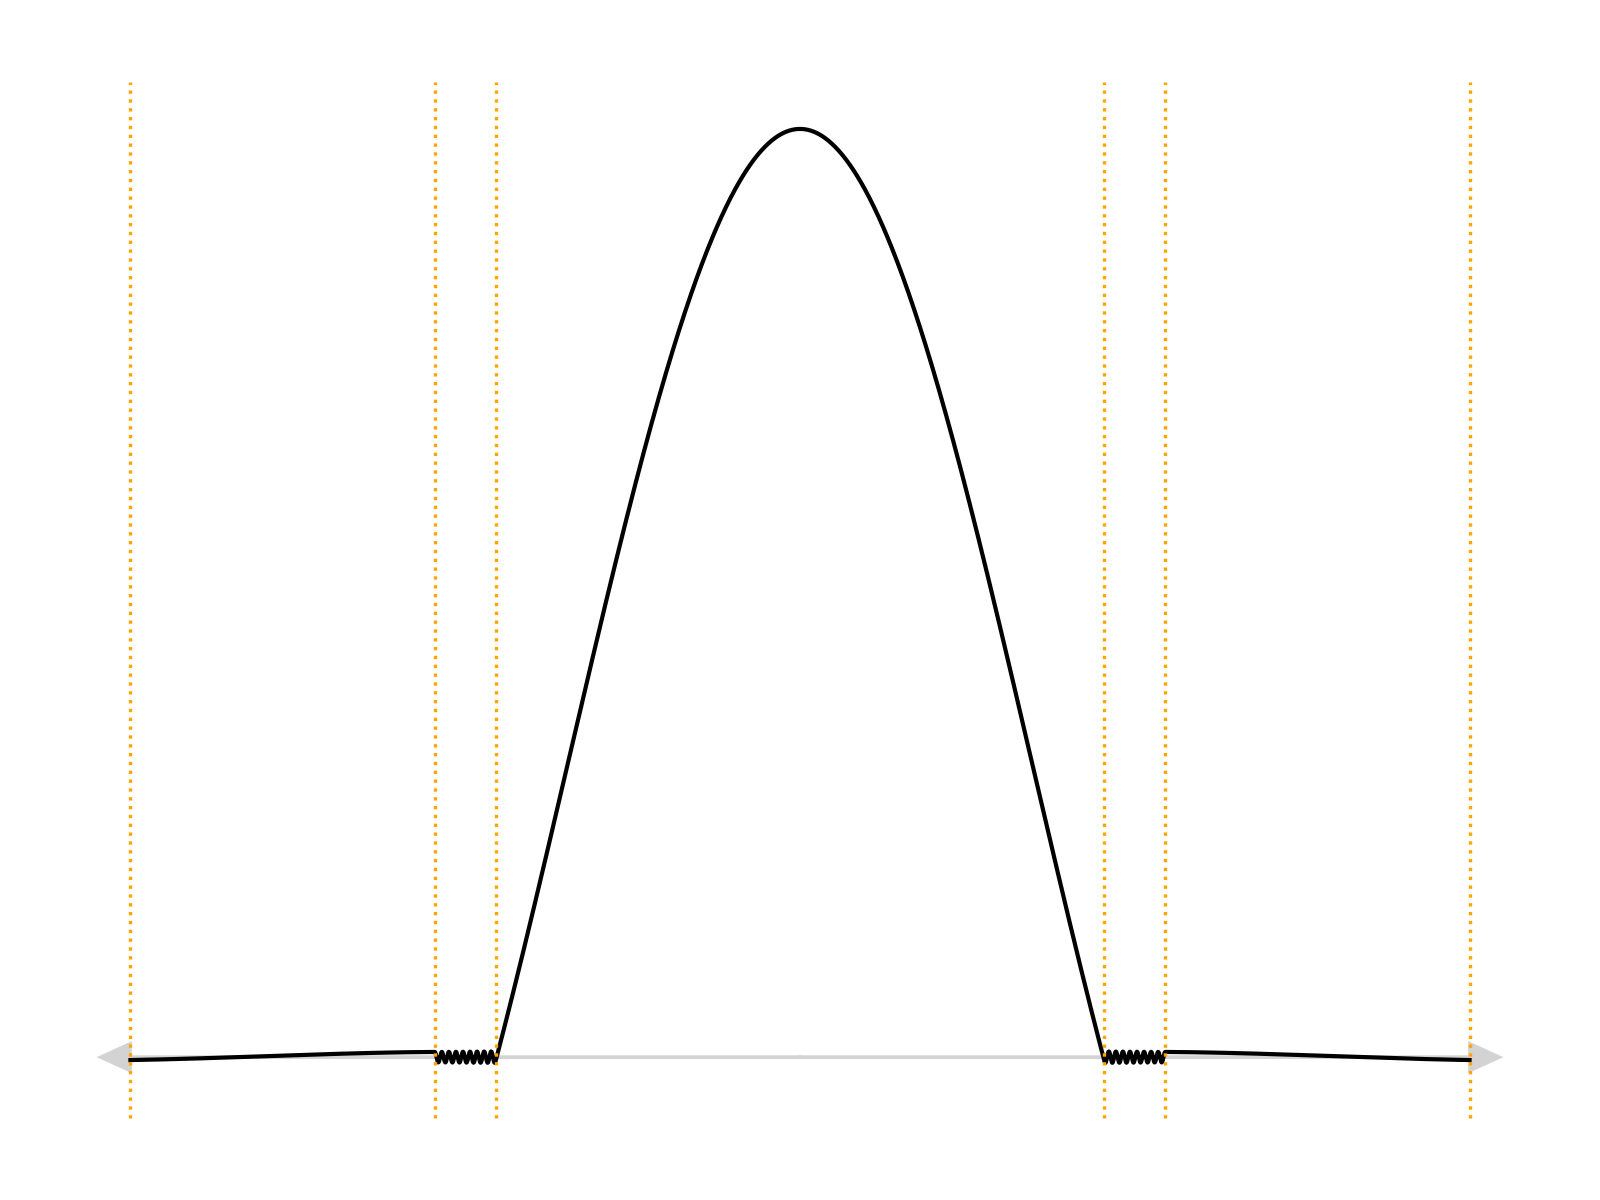

Text(0.5, 55.583333333333314, '\nDistance from Fiber Center')

In [53]:
%matplotlib notebook
fig, ax = A.plot1D(u['Ez_rad'], double_r=True, rlist=[400,10000,400], nu=nu, maxscale=True,
                  linewidth=1.5, color='k')
Rhos = A.rhos/A.scale

ax.arrow(0,0, Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.03, head_length=.1)
ax.arrow(0,0, -Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.03, head_length=.1)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
m, M = ax.get_ylim()
for r in Rhos:
    ax.plot([r,r], [m, M], 'orange', linewidth=1.2, linestyle=':')
    ax.plot([-r,-r], [m, M], 'orange', linewidth=1.2, linestyle=':')
ax.set_xlabel('\nDistance from Fiber Center')


# Numerical

In [ ]:
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air,  lambda x:n_air]

ts = [5e-05, 1e-5, 2e-05, 2e-05]

mats = ['air', 'glass', 'air', 'Outer']

maxhs = [.1,.01, .08, .1]
wl=1.2e-06
scale = ts[0]
B = Bragg(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=wl, scale=scale)


In [ ]:
Draw(B.mesh)

In [ ]:
Z2 = B.sqrZfrom(beta1/A.scale)
Z = Z2**.5
Z

In [ ]:
center = Z
radius = 0.1

p = 1
z, y, yl, beta, P, _ = B.leakymode(p,nspan=4,npts=4,
                                    rad=radius,
                                    ctr=center,
#                                     rhoinv=.9,
#                                     quadrule='ellipse_trapez_shift',
                                    alpha=5,
                                    niterations=5, nrestarts=0)

In [ ]:
for f in y:
    Draw(1e3*f, B.mesh)

# Resonant mode ?

Would be good to do the wavelength study on this and see if it still has spikes.  It does, 

In [54]:
n_air = 1
n_glass = 1.44

ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]

ts = [5e-05, 1e-5, 5e-05]

mats = ['air', 'glass', 'air']
scale = ts[0]
maxhs = [.1,.01, .1]
wl = 1.2e-06
scale = ts[0]

In [55]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = ts[1]

ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls

array([1.88390311e-06, 1.72691118e-06, 1.59407186e-06, 1.48020958e-06])

In [137]:
wl_res= 1.5938e-06  # can't get convergence directly at ls[2], so we take wl very near it

In [138]:
C = BraggScalar(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=wl_res)



Boundary names not provided, using default names.


In [139]:
k_low = C.k0 * C.ns[0] * C.scale
k_low

197.11335510037603

In [140]:
outer = 'h2'
Ktype = 'kappa'
nu = 0

In [141]:
def better_det_vec(beta, nu=1, outer='h2', Ktype='kappa'): # for plotlogf
    k_low = C.k0 * C.ns[0] * C.scale
    out = C.determinant(beta, nu, outer, Ktype)
    out[np.where(beta.real>=k_low)] += 1000
    return out
    
def better_det_scalar(beta, nu=1, outer='h2', Ktype='kappa'): # for newton method
    k_low = C.k0 * C.ns[0] * C.scale        
    out = C.determinant(beta, nu, outer, Ktype) 
    if beta.real>=k_low:
        out += 1000
    return out

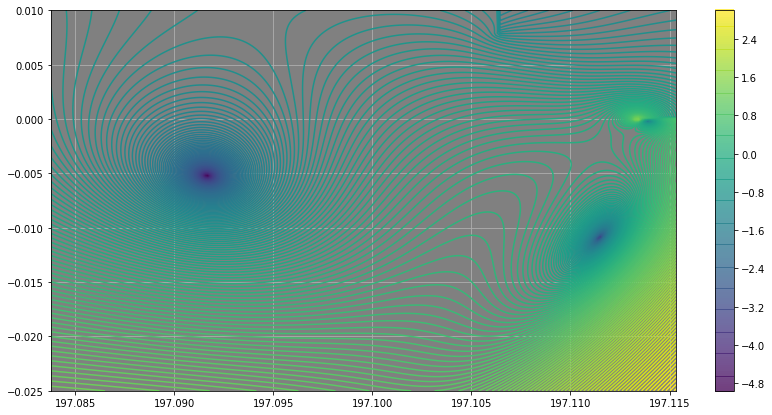

In [142]:
%matplotlib inline
plotlogf(C.determinant, .99985*k_low, 1.00001*k_low, -.025,.01, nu, outer, Ktype,
         iref=200, rref=200, levels=200)
import matplotlib.pyplot as plt
plt.plot([197.11701509569713],[-0.005370101356775429], marker='o', color='r')

In [153]:
guess = np.array(.9999*k_low-.005j)

# print(guess)

beta1 = newton(C.determinant, guess, args=(nu, outer, Ktype), tol = 1e-14, maxiter=1000)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(C.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (197.09141313666248-0.007826150544354085j) . Residual of determinant:  1.0211943693705437e-12


# Bragg Exact Fields

In [154]:
UB = C.all_fields(beta1, nu, outer, Ktype)

### Electric

In [155]:
Draw(UB, C.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [135]:
fsB = C.fields_matplot(beta1, nu, outer, Ktype)

In [157]:
C.plot1D?

<IPython.core.display.Javascript object>


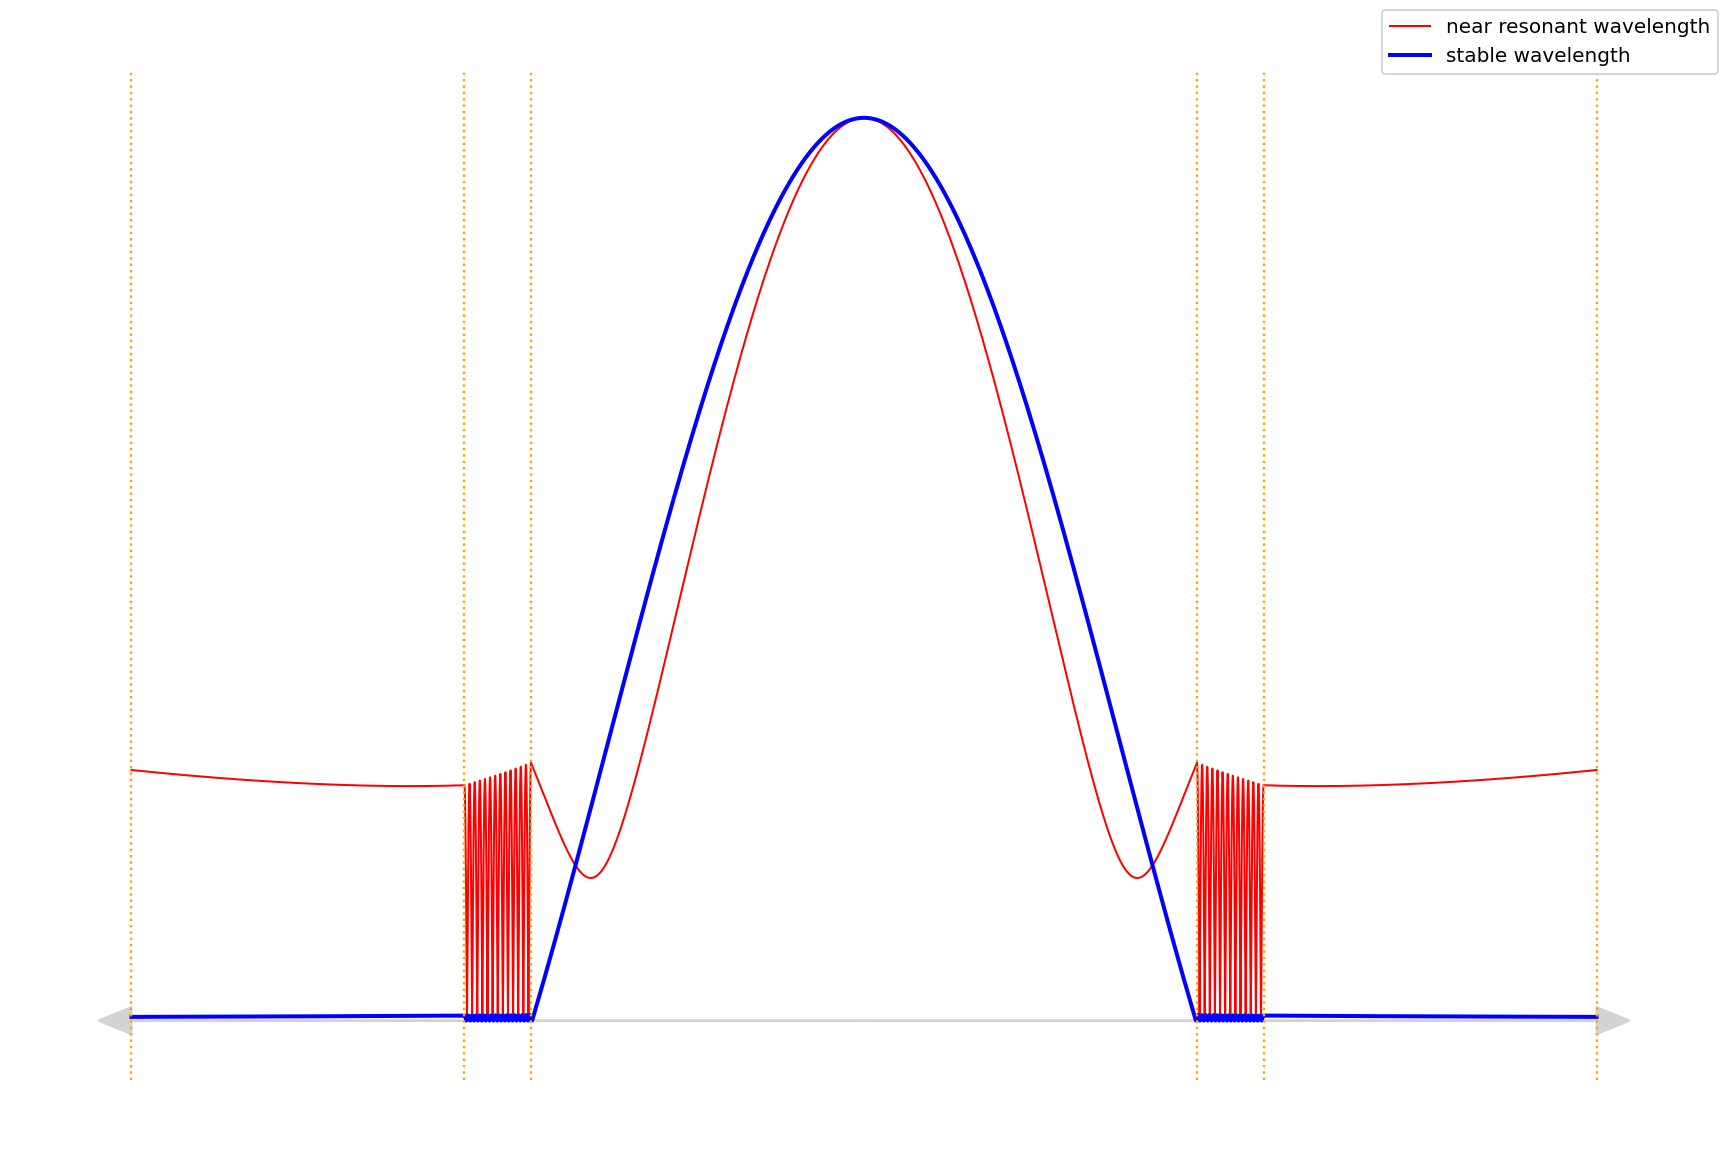

Text(0.5, 64.5, '\nDistance from Fiber Center')

In [169]:
%matplotlib notebook
fig, ax = C.plot1D(fsB['Ez_rad'], double_r=True, rlist=[10000,100000,10000], nu=nu, maxscale=True,
                  linewidth=1, color='red', figsize=(12,8), label='near resonant wavelength', part='norm')

C.add1D_plot(ax, u['Ez_rad'], double_r=True, nu=nu, part='norm', color='blue', linewidth=2, label='stable wavelength')
Rhos = C.rhos/C.scale
fig.legend()

ax.arrow(0,0, Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.03, head_length=.1)
ax.arrow(0,0, -Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.03, head_length=.1)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
m, M = ax.get_ylim()
for r in Rhos:
    ax.plot([r,r], [m, M], 'orange', linewidth=1.2, linestyle=':')
    ax.plot([-r,-r], [m, M], 'orange', linewidth=1.2, linestyle=':')
ax.set_xlabel('\nDistance from Fiber Center')
